## Setup and Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('darkgrid')

In [2]:
# cms opioid prescriber data
opi_pres_sum_13_raw = pd.read_csv("../../raw_data/Medicare_Part_D_Opioid_Prescriber_Summary_File_2013.csv")
opi_pres_sum_14_raw = pd.read_csv("../../raw_data/Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv")
opi_pres_sum_15_raw = pd.read_csv("../../raw_data/Medicare_Part_D_Opioid_Prescriber_Summary_File_2015.csv")
opi_pres_sum_16_raw = pd.read_csv("../../raw_data/Medicare_Part_D_Opioid_Prescriber_Summary_File_2016.csv")
opi_pres_sum_17_raw = pd.read_csv("../../raw_data/Medicare_Part_D_Opioid_Prescriber_Summary_File_2017.csv")

In [3]:
# cms non-opioid prescriber data (big)
cms_all_pres_raw = pd.read_csv("../../raw_data/medicare_prescription_all_drugs/PartD_Prescriber_PUF_NPI_Drug_17.txt", sep='\t')

In [4]:
# zipcode - town association attempts
## zipcode - town lists (copy paste from websites)
zip_town_raw = pd.read_csv('../../raw_data/ma_town_zipcode_list.txt', sep="(", header=None)
zip_town_raw_alt = pd.read_csv('../../raw_data/ma_town_zipcode_list_alt.txt', sep='\t')
## shapfile of ma postal zipcodes
ma_postzip_map = gpd.read_file('../../raw_data/zipcodes_nt/ZIPCODES_NT_POLY.shp')
# compare zipcodes and town names to the overdose deaths dataset (351 towns)
ma_over_death = pd.read_csv("../../clean_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")

In [5]:
# easier column names for opi prescriber dfs
lwr_column_names =[x.lower().replace(' ', '_') for x in opi_pres_sum_13_raw.columns]
raw_opi_dflist = [opi_pres_sum_13_raw, opi_pres_sum_14_raw, opi_pres_sum_15_raw, opi_pres_sum_16_raw, opi_pres_sum_17_raw]
for x in raw_opi_dflist:
    x.columns = lwr_column_names

In [6]:
opi_pres_sum_17_raw.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,677,25.0,3.69,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1946,1040.0,53.44,200.0,19.23
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,55,14.0,25.45,0.0,0.00
3,1003000175,REYES-VASQUEZ,BELINDA,91744.0,CA,Dentist,18,0.0,0.00,0.0,NaN
4,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,90,0.0,0.00,0.0,NaN


In [7]:
opi_pres_17_MA = opi_pres_sum_17_raw[opi_pres_sum_17_raw['nppes_provider_state'] == 'MA'].copy()

In [8]:
opi_pres_17_MA.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
36,1003002312,HOPKINS,PATRICIA,2169.0,MA,Rheumatology,4487,513.0,11.43,84.0,16.37
118,1003007477,ABDOW,KIMBERLY,1609.0,MA,Nurse Practitioner,5314,0.0,0.00,0.0,NaN
132,1003008244,RAJBHANDARI,RUMA,2115.0,MA,Gastroenterology,56,0.0,0.00,0.0,NaN
189,1003011610,RAY,ALAKA,2114.0,MA,Internal Medicine,1993,62.0,3.11,NaN,NaN
224,1003012766,KANO,ZACHARY,2445.0,MA,Dentist,19,0.0,0.00,0.0,NaN


In [9]:
all_pres_17_MA = cms_all_pres_raw[cms_all_pres_raw['nppes_provider_state'] == 'MA'].copy()
all_pres_17_MA_prov = all_pres_17_MA.iloc[:, 0:6].copy().drop_duplicates()
display(all_pres_17_MA_prov.head())

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description
757,1003002312,HOPKINS,PATRICIA,QUINCY,MA,Rheumatology
2478,1003007477,ABDOW,KIMBERLY,WORCESTER,MA,Nurse Practitioner
2997,1003008244,RAJBHANDARI,RUMA,BOSTON,MA,Gastroenterology
4569,1003011610,RAY,ALAKA,BOSTON,MA,Internal Medicine
5158,1003012766,KANO,ZACHARY,BROOKLINE,MA,Dentist


In [10]:
# sanity check
print(len(set(opi_pres_17_MA['npi']) - set(all_pres_17_MA['npi'])))
print(len(set(all_pres_17_MA['npi']) - set(opi_pres_17_MA['npi'])))
print(len(set(opi_pres_17_MA['npi']) - set(cms_all_pres_raw['npi'])))
print(len(set(all_pres_17_MA['npi'])))
print(len(set(opi_pres_17_MA['npi'])))

8430
0
8430
27300
35730


In [11]:
all_pres_17_MA_prov.shape

(27300, 6)

In [12]:
opi_pres_17_MA['nppes_provider_zip_code'] = [x.zfill(5) for x in list(opi_pres_17_MA['nppes_provider_zip_code'].astype(int).astype(str))]

In [13]:
all_pres_17_MA.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'bene_count_ge65_suppress_flag',
       'total_claim_count_ge65', 'ge65_suppress_flag',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65'],
      dtype='object')

In [14]:
opi_pres_MA_miss = opi_pres_17_MA[~ opi_pres_17_MA['npi'].isin(set(all_pres_17_MA['npi']))].copy()

In [15]:
opi_pres_MA_miss.columns

Index(['npi', 'nppes_provider_last_name', 'nppes_provider_first_name',
       'nppes_provider_zip_code', 'nppes_provider_state',
       'specialty_description', 'total_claim_count', 'opioid_claim_count',
       'opioid_prescribing_rate', 'long-acting_opioid_claim_count',
       'long-acting_opioid_prescribing_rate'],
      dtype='object')

In [16]:
opi_pres_MA_miss['specialty_description'].value_counts()

Internal Medicine                                                 1355
Nurse Practitioner                                                1011
Student in an Organized Health Care Education/Training Program     890
Dentist                                                            890
Physician Assistant                                                550
                                                                  ... 
Interventional Cardiology                                            1
Occupational Therapist in Private Practice                           1
Specialist/Technologist                                              1
Behavior Analyst                                                     1
Community/Behavioral Health                                          1
Name: specialty_description, Length: 97, dtype: int64

In [17]:
all_pres_17_MA['specialty_description'].value_counts()

Internal Medicine                                     242242
Nurse Practitioner                                     85862
Family Practice                                        83128
Psychiatry                                             26665
Physician Assistant                                    26472
                                                       ...  
Registered Dietitian or Nutrition Professional             1
Hospital                                                   1
Midwife                                                    1
Thoracic Surgery (Cardiothoracic Vascular Surgery)         1
Assistant, Podiatric                                       1
Name: specialty_description, Length: 96, dtype: int64

In [18]:
opi_pres_17_MA.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
36,1003002312,HOPKINS,PATRICIA,02169,MA,Rheumatology,4487,513.0,11.43,84.0,16.37
118,1003007477,ABDOW,KIMBERLY,01609,MA,Nurse Practitioner,5314,0.0,0.00,0.0,NaN
132,1003008244,RAJBHANDARI,RUMA,02115,MA,Gastroenterology,56,0.0,0.00,0.0,NaN
189,1003011610,RAY,ALAKA,02114,MA,Internal Medicine,1993,62.0,3.11,NaN,NaN
224,1003012766,KANO,ZACHARY,02445,MA,Dentist,19,0.0,0.00,0.0,NaN


In [19]:
print(opi_pres_17_MA.shape)
print(all_pres_17_MA_prov.shape)

(35730, 11)
(27300, 6)


In [20]:
# give the all drug prescribers zipcodes
all_pres_17_MA_prov = all_pres_17_MA_prov.merge(opi_pres_17_MA[['npi', 'nppes_provider_zip_code']], on='npi', how='left')

In [21]:
all_pres_17_MA_prov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27300 entries, 0 to 27299
Data columns (total 7 columns):
npi                             27300 non-null int64
nppes_provider_last_org_name    27299 non-null object
nppes_provider_first_name       27300 non-null object
nppes_provider_city             27300 non-null object
nppes_provider_state            27300 non-null object
specialty_description           27300 non-null object
nppes_provider_zip_code         27300 non-null object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [22]:
len(set(all_pres_17_MA_prov['nppes_provider_city']))

456

In [25]:
set(all_pres_17_MA_prov['nppes_provider_city'].str.lower()) - set(ma_over_death['city_death'])

{'allston',
 'ann arbor',
 'ashburham',
 'assonet',
 'attleboro falls',
 'auburndale',
 'baldwinville',
 'beford',
 'beverly farms',
 'boston, ma',
 'bradford',
 'brighton',
 'brighton, ma',
 'brochton',
 'brocktom',
 'buzzards bay',
 'byfield',
 'cambirdge',
 'centerville',
 'charlestown',
 'chestnut hill',
 'cotuit',
 'dennis port',
 'dorchester',
 'dorchester center',
 'e bridgewater',
 'e falmouth',
 'e longmeadow',
 'e sandwich',
 'e. wareham',
 'e. weymouth',
 'east boston',
 'east cambridge',
 'east dennis',
 'east douglas',
 'east falmouth',
 'east freetown',
 'east lynn',
 'east orleans',
 'east sandwich',
 'east walpole',
 'east wareham',
 'east weymouth',
 'everette',
 'feeding hills',
 'flint',
 'florence',
 'forestdale',
 'foxboro',
 'fram',
 'fromingham',
 'gand rapids',
 'gt barrington',
 'hanscom afb',
 'hanscon afb',
 'harwich port',
 'hathorne',
 'haverhilll',
 'haydenville',
 'hyannis',
 'hyde park',
 'indian orchard',
 'jamaica plain',
 'lanesboro',
 'laurence',
 'l

In [26]:
zip_town_raw.head()

,0,1
0,02351 Abington,781)
1,02018 Accord,781)
2,01718 Acton,978)
3,01719 Acton,978)
4,01720 Acton,978)


In [28]:
zip_town = zip_town_raw.iloc[:, [0]].copy()
zip_town.columns = ['col1']
zip_town['zip'] = [x[:5] for x in zip_town['col1']]
zip_town.head()

,col1,zip
0,02351 Abington,02351
1,02018 Accord,02018
2,01718 Acton,01718
3,01719 Acton,01719
4,01720 Acton,01720


In [29]:
zip_town['town'] = [x[6:] for x in zip_town['col1']]
# towns have white spaces at the end (carryover from formatting)
zip_town['town'] = zip_town['town'].str.strip().str.lower()
zip_town.drop('col1', axis=1, inplace=True)
zip_town.head()

,zip,town
0,02351,abington
1,02018,accord
2,01718,acton
3,01719,acton
4,01720,acton


In [30]:
ma_over_death.head()

,city_death,2014,2015,2016,2017,2018
0,abington,0,6,1,3,5
1,acton,1,2,3,0,1
2,acushnet,0,4,2,4,0
3,adams,2,3,1,0,4
4,agawam,1,2,0,4,8


In [31]:
print(len(set(zip_town['town'])))
print(len(set(ma_over_death['city_death'])))

806
351


In [87]:
np.unique(zip_town['town'])
# town names are too granular, try another source

array(['abington', 'accord', 'acton', 'acushnet', 'adams',
       'aetna life & casualty co', 'agawam', 'alford', 'allendale',
       'allmerica', 'allston', 'amesbury', 'amherst', 'andover',
       'aquinnah', 'arlington', 'arlington heights', 'ashburnham',
       'ashby', 'ashfield', 'ashland', 'ashley falls', 'assinippi',
       'assonet', 'athol', 'attleboro', 'attleboro falls', 'auburn',
       'auburndale', 'avon', 'ayer', 'babson park', 'baldwinville',
       'bank of america', 'baptist corner', 'barnstable', 'barre',
       'bass river', 'bay state village', 'bay state west tower',
       'baystate medical', 'beachmont', 'becket', 'becket corners',
       'bedford', 'belchertown', 'bellingham', 'belmont', 'berkley',
       'berkshire', 'berkshire heights', 'berlin', 'bernardston',
       'beverly', 'beverly farms', 'big pond', 'billerica', 'blackstone',
       'blandford', 'blissville', 'bolton', 'bondsville', 'boston',
       'boston city hall', 'boston college',
       'bosto

In [32]:
zip_town_raw_alt.head()

,ZIP Code,City,County,Type
0,ZIP Code 01001,Agawam,Hampden,Standard
1,ZIP Code 01002,Amherst,Hampshire,Standard
2,ZIP Code 01003,Amherst,Hampshire,Standard
3,ZIP Code 01004,Amherst,Hampshire,P.O. Box
4,ZIP Code 01005,Barre,Worcester,Standard


In [33]:
zip_town_raw_alt.columns = [x.lower().strip() for x in list(zip_town_raw_alt.columns)]

In [34]:
len(np.unique(zip_town_raw_alt['city']))

512

In [35]:
zip_town_raw_alt['type'].value_counts()

Standard    492
P.O. Box    156
Unique       34
Name: type, dtype: int64

In [36]:
zip_stand = zip_town_raw_alt[zip_town_raw_alt['type'] == 'Standard'].copy()
print(len(set(zip_stand['city'])))
# closer count - try matching what's missing
zip_stand['city'] = zip_stand['city'].str.lower()
zip_stand.head()

417


,zip code,city,county,type
0,ZIP Code 01001,agawam,Hampden,Standard
1,ZIP Code 01002,amherst,Hampshire,Standard
2,ZIP Code 01003,amherst,Hampshire,Standard
4,ZIP Code 01005,barre,Worcester,Standard
5,ZIP Code 01007,belchertown,Hampshire,Standard


In [37]:
# mismatches
print(len(set(ma_over_death['city_death']) - set(zip_stand['city'])))
print(len(set(zip_stand['city']) - set(ma_over_death['city_death'])))
# maybe there's a better source

40
106


In [38]:
ma_postzip_map.head()

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.6014999971 930766.1334999986,..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.2437999994 882113.238499999, ..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.9670000002 933358.561999999, ..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.64249999821 914027.9114000015,..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990199998 830521.8995000012, ..."


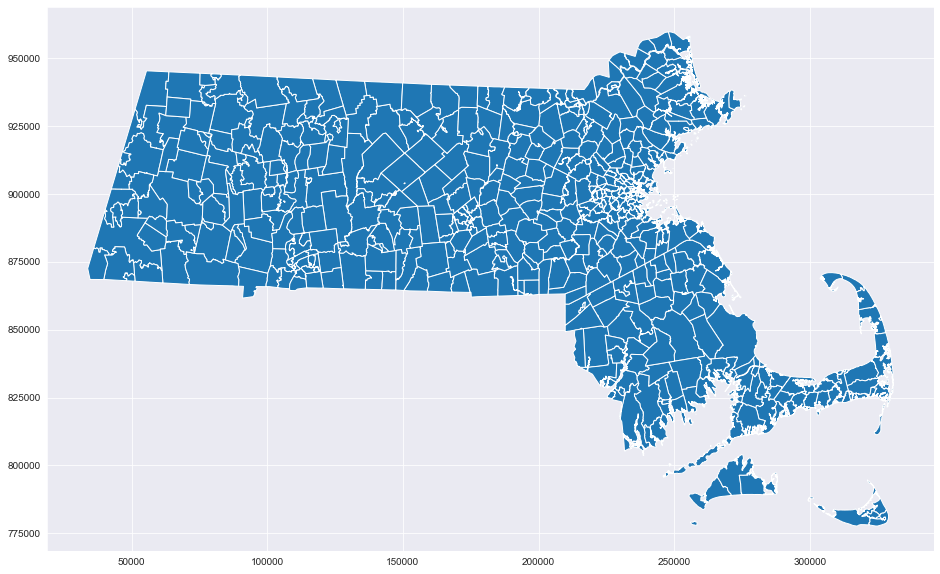

In [39]:
ma_postzip_map.plot(figsize=(16,10))

In [40]:
print(len(set(ma_postzip_map['CITY_TOWN'])))
print(len(set(ma_postzip_map['PC_NAME'])))

335
458


In [41]:
set(ma_postzip_map['CITY_TOWN'].str.lower().str.replace(', town of', '')) - set(ma_over_death['city_death'])

{'manchester by the sea', 'mt washington', 'north attleborough'}

In [42]:
set(ma_over_death['city_death']) - set(ma_postzip_map['CITY_TOWN'].str.lower().str.replace(', town of', ''))

{'alford',
 'aquinnah',
 'clarksburg',
 'egremont',
 'granville',
 'hawley',
 'leyden',
 'manchester',
 'montgomery',
 'mount washington',
 'new ashford',
 'north attleboro',
 'pelham',
 'peru',
 'phillipston',
 'tisbury',
 'washington',
 'west tisbury',
 'westhampton'}

In [48]:
ma_over_death['city_death_match'] = ma_over_death['city_death'].str.replace('manchester', 'manchester by the sea').str.replace('mount washington', 'mt washington').str.replace('north attleboro', 'north attleborough')

In [51]:
# death counts for towns/cities I'm missing
ma_over_death[ma_over_death['city_death_match'].isin(set(ma_over_death['city_death_match']) - set(ma_postzip_map['CITY_TOWN'].str.lower().str.replace(', town of', '')))]

,city_death,2014,2015,2016,2017,2018,city_death_match
5,alford,0,0,0,0,0,alford
9,aquinnah,0,0,0,0,0,aquinnah
63,clarksburg,0,0,0,1,0,clarksburg
90,egremont,0,0,0,0,0,egremont
111,granville,0,0,0,0,0,granville
128,hawley,0,0,0,0,0,hawley
155,leyden,0,0,0,0,0,leyden
193,montgomery,0,0,0,0,0,montgomery
199,new ashford,0,0,0,0,0,new ashford
229,pelham,0,0,0,0,0,pelham


In [52]:
zip_miss = set(opi_pres_17_MA['nppes_provider_zip_code']) - set(ma_postzip_map['POSTCODE'])

In [53]:
opi_pres_17_MA[opi_pres_17_MA['nppes_provider_zip_code'].isin(zip_miss)]

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
303,1003015686,BLUME,DEBORAH,01199,MA,Physician Assistant,1562,28.0,1.79,0.0,0.0
769,1003041971,IRONS,HILLARY,01655,MA,Emergency Medicine,53,NaN,NaN,0.0,NaN
1516,1003080151,NICORA,AGNIESZKA,01199,MA,Emergency Medicine,216,NaN,NaN,0.0,NaN
1662,1003090143,DUBIN,JOSEPH,01805,MA,Internal Medicine,139,NaN,NaN,0.0,NaN
1995,1003108259,KORAPATI,SOWMYA,01655,MA,Hematology-Oncology,15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1159959,1992854707,ABRAMOV,KONSTANTIN,01655,MA,Nephrology,1519,27.0,1.78,NaN,NaN
1160834,1992891352,DEPETERS,FRANKLIN,01655,MA,Diagnostic Radiology,68,0.0,0.00,0.0,NaN
1161153,1992902977,CROWLEY,JILLIAN,01199,MA,Physician Assistant,107,18.0,16.82,0.0,0.0
1162263,1992964183,MACLACHLAN,LARA,01805,MA,Urology,1487,NaN,NaN,0.0,NaN


In [68]:
postzip_town_match = ma_postzip_map.iloc[:, 0:7]
postzip_town_match.head()
print(sum(postzip_town_match['PC_NAME'] != postzip_town_match['PA_NAME']))
display(postzip_town_match[postzip_town_match['PC_NAME'] != postzip_town_match['PA_NAME']])
postzip_town_match = postzip_town_match.apply(lambda x: x.str.lower())
postzip_town_match['CITY_TOWN'] = postzip_town_match['CITY_TOWN'].str.replace(', town of', '')
postzip_town_match.head()

3


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY
497,01441,TYCO,UNIQUE ORGANIZATION,WESTMINSTER,76975,"WESTMINSTER, TOWN OF",WORCESTER
520,02357,STONEHILL COLLEGE,UNIQUE ORGANIZATION,NORTH EASTON,47625,"EASTON, TOWN OF",BRISTOL
530,01063,SMITH COLLEGE,UNIQUE ORGANIZATION,NORTHAMPTON,46330,NORTHAMPTON,HAMPSHIRE


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY
0,01331,athol,non unique,athol,02515,athol,worcester
1,01085,westfield,non unique,westfield,76030,westfield,hampden
2,01370,shelburne falls,non unique,shelburne falls,61205,shelburne,franklin
3,01235,hinsdale,non unique,hinsdale,30280,hinsdale,berkshire
4,02747,north dartmouth,non unique,north dartmouth,47450,dartmouth,bristol


In [70]:
print(set(ma_over_death['city_death_match']) - set(postzip_town_match['CITY_TOWN']))
print(set(postzip_town_match['CITY_TOWN']) - set(ma_over_death['city_death_match']))

{'leyden', 'tisbury', 'washington', 'west tisbury', 'new ashford', 'montgomery', 'alford', 'aquinnah', 'pelham', 'granville', 'westhampton', 'egremont', 'hawley', 'phillipston', 'peru', 'clarksburg'}
set()


In [73]:
len(zip_miss)

74

In [120]:
zip_town_raw_alt.head()

,zip code,city,county,type
0,ZIP Code 01001,Agawam,Hampden,Standard
1,ZIP Code 01002,Amherst,Hampshire,Standard
2,ZIP Code 01003,Amherst,Hampshire,Standard
3,ZIP Code 01004,Amherst,Hampshire,P.O. Box
4,ZIP Code 01005,Barre,Worcester,Standard


In [122]:
zip_town.head()

,zip,town
0,02351,abington
1,02018,accord
2,01718,acton
3,01719,acton
4,01720,acton


In [75]:
print(set(ma_over_death['city_death_match']) - set(zip_town['town']))
print(set(ma_over_death['city_death_match']) - set(zip_town_raw_alt['city'].str.lower()))
#zip_town will get me more towns

{'freetown', 'north attleborough', 'gosnold', 'yarmouth'}
{'monroe', 'tyngsborough', 'clarksburg', 'hancock', 'alford', 'tolland', 'yarmouth', 'egremont', 'phillipston', 'peru', 'new marlborough', 'manchester by the sea', 'tisbury', 'new ashford', 'montgomery', 'aquinnah', 'pelham', 'foxborough', 'gosnold', 'florida', 'freetown', 'leyden', 'washington', 'middleborough', 'shelburne', 'westhampton', 'hawley', 'bourne', 'north attleborough', 'mt washington'}


In [76]:
print(len(zip_miss))
print(len(zip_town[zip_town['zip'].isin(zip_miss)]))

74
36


In [82]:
zip_fill = zip_town[zip_town['zip'].isin(zip_miss) & zip_town['town'].isin(set(ma_over_death['city_death']))]
zip_fill

,zip,town
88,02117,boston
111,02199,boston
118,02211,boston
124,02241,boston
143,02185,braintree
148,02325,bridgewater
167,01805,burlington
177,02238,cambridge
298,02334,easton
309,02722,fall river


In [94]:
zip_town_fin = postzip_town_match[['POSTCODE', 'CITY_TOWN']]
zip_town_fin.columns = list(zip_fill.columns)
zip_town_fin = pd.concat([zip_town_fin, zip_fill]).reindex()
print(zip_town_fin.shape)
print(zip_town_fin.drop_duplicates().shape)
zip_town_fin.head()

(572, 2)
(572, 2)


,zip,town
0,01331,athol
1,01085,westfield
2,01370,shelburne
3,01235,hinsdale
4,02747,dartmouth


In [97]:
print(set(ma_over_death['city_death_match']) - set(zip_town_fin['town']))
print(set(zip_town_fin['town']) - set(ma_over_death['city_death_match']))

{'leyden', 'washington', 'new ashford', 'montgomery', 'alford', 'aquinnah', 'pelham', 'granville', 'westhampton', 'egremont', 'hawley', 'phillipston', 'peru', 'clarksburg'}
set()


In [143]:
#pd.DataFrame(list(zip_miss - set(zip_fill['zip']))).to_csv('missing_zipcodes.csv')

In [104]:
zip_miss_town = zip_town[zip_town['zip'].isin(zip_miss) & ~zip_town['town'].isin(set(ma_over_death['city_death']))].copy()
zip_miss_town['alt_town'] = ['springfield', 'bridgewater', 'orleans',
                   'boston', 'cambridge', 'danvers',
                   'burlington', 'plymouth', 'marshfield',
                   'eastham', 'northampton', 'winchendon', 'winchendon']

In [105]:
zip_miss_town

,zip,town,alt_town
54,01199,baystate medical,springfield
149,02325,bridgewater state college,bridgewater
282,02643,east orleans,orleans
323,02241,fleet bank boston,boston
383,02238,harvard square,cambridge
391,01937,hathorne,danvers
445,01805,lahey clinic medical center,burlington
498,02345,manomet,plymouth
509,02051,marshfield hills,marshfield
651,02651,north eastham,eastham


In [106]:
set(zip_miss_town['alt_town']) - set(ma_over_death['city_death_match'])

set()

In [108]:
#zip_town_fin
zip_miss_town = zip_miss_town.drop('town', axis=1)
zip_miss_town.columns = zip_town_fin.columns

In [115]:
zip_town_fin = pd.concat([zip_town_fin, zip_miss_town]).drop_duplicates()
print(zip_town_fin.shape)
zip_town_fin.head()

(578, 2)


,zip,town
0,01331,athol
1,01085,westfield
2,01370,shelburne
3,01235,hinsdale
4,02747,dartmouth


In [117]:
print(set(zip_town_fin['town']) - set(ma_over_death['city_death_match']))
print(set(ma_over_death['city_death_match']) - set(zip_town_fin['town']))

set()
{'leyden', 'washington', 'new ashford', 'montgomery', 'alford', 'aquinnah', 'pelham', 'granville', 'westhampton', 'egremont', 'hawley', 'phillipston', 'peru', 'clarksburg'}


In [123]:
display(opi_pres_17_MA.head())
display(all_pres_17_MA_prov.head())

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
36,1003002312,HOPKINS,PATRICIA,02169,MA,Rheumatology,4487,513.0,11.43,84.0,16.37
118,1003007477,ABDOW,KIMBERLY,01609,MA,Nurse Practitioner,5314,0.0,0.00,0.0,NaN
132,1003008244,RAJBHANDARI,RUMA,02115,MA,Gastroenterology,56,0.0,0.00,0.0,NaN
189,1003011610,RAY,ALAKA,02114,MA,Internal Medicine,1993,62.0,3.11,NaN,NaN
224,1003012766,KANO,ZACHARY,02445,MA,Dentist,19,0.0,0.00,0.0,NaN


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,nppes_provider_zip_code
0,1003002312,HOPKINS,PATRICIA,QUINCY,MA,Rheumatology,02169
1,1003007477,ABDOW,KIMBERLY,WORCESTER,MA,Nurse Practitioner,01609
2,1003008244,RAJBHANDARI,RUMA,BOSTON,MA,Gastroenterology,02115
3,1003011610,RAY,ALAKA,BOSTON,MA,Internal Medicine,02114
4,1003012766,KANO,ZACHARY,BROOKLINE,MA,Dentist,02445


In [131]:
# number of opi prescribers now missing:
print(opi_pres_17_MA[opi_pres_17_MA['nppes_provider_zip_code'].isin(set(opi_pres_17_MA['nppes_provider_zip_code']) - set(zip_town_fin['zip']))].shape)
# number of all drug prescribers now missing:
print(all_pres_17_MA_prov[all_pres_17_MA_prov['nppes_provider_zip_code'].isin(set(all_pres_17_MA_prov['nppes_provider_zip_code']) - set(zip_town_fin['zip']))].shape)

(52, 11)
(41, 7)


In [140]:
#opi_pres_17_wtown 
zip_town_counts = zip_town_fin['zip'].value_counts().reset_index()
zip_town_counts.columns = ['zip', 'count']
print(zip_town_counts[zip_town_counts['count'] > 1].shape)
zip_town_counts[zip_town_counts['count'] > 1]

(23, 2)


,zip,count
0,02467,3
1,01082,3
2,01011,2
3,01247,2
4,01039,2
5,01434,2
6,01223,2
7,02148,2
8,02135,2
9,02532,2


In [144]:
# number of opi prescribers w/more than 1 town association:
print(opi_pres_17_MA[opi_pres_17_MA['nppes_provider_zip_code'].isin(set(zip_town_counts[zip_town_counts['count'] > 1]['zip']))].shape)
# number of all drug prescribers w/more than 1 town association:
print(all_pres_17_MA_prov[all_pres_17_MA_prov['nppes_provider_zip_code'].isin(set(zip_town_counts[zip_town_counts['count'] > 1]['zip']))].shape)

(1156, 11)
(876, 7)


In [146]:
opi_pres_17_MA.head()
zip_town_fin.head()

,zip,town
0,01331,athol
1,01085,westfield
2,01370,shelburne
3,01235,hinsdale
4,02747,dartmouth


In [148]:
opi_pres_17_MA.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate
36,1003002312,HOPKINS,PATRICIA,02169,MA,Rheumatology,4487,513.0,11.43,84.0,16.37
118,1003007477,ABDOW,KIMBERLY,01609,MA,Nurse Practitioner,5314,0.0,0.00,0.0,NaN
132,1003008244,RAJBHANDARI,RUMA,02115,MA,Gastroenterology,56,0.0,0.00,0.0,NaN
189,1003011610,RAY,ALAKA,02114,MA,Internal Medicine,1993,62.0,3.11,NaN,NaN
224,1003012766,KANO,ZACHARY,02445,MA,Dentist,19,0.0,0.00,0.0,NaN


In [173]:
opi_pres_17_MA['nppes_provider_last_name'] = opi_pres_17_MA['nppes_provider_last_name'].str.lower()
opi_pres_17_MA['nppes_provider_first_name'] = opi_pres_17_MA['nppes_provider_first_name'].str.lower()
opi_pres_17_MA['specialty_description'] = opi_pres_17_MA['specialty_description'].str.lower()
print(opi_pres_17_MA.shape)
opi_pres_17_town = opi_pres_17_MA.merge(zip_town_fin, how='inner', left_on='nppes_provider_zip_code', right_on='zip')
print(opi_pres_17_town.shape)
opi_pres_17_town.head()

(35730, 11)
(37069, 13)


,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate,zip,town
0,1003002312,hopkins,patricia,02169,MA,rheumatology,4487,513.0,11.43,84.0,16.37,02169,quincy
1,1003083270,kabadi,mitesh,02169,MA,cardiology,1363,0.0,0.00,0.0,NaN,02169,quincy
2,1003291121,blair,meghan,02169,MA,nurse practitioner,905,0.0,0.00,0.0,NaN,02169,quincy
3,1003834433,nair,anil,02169,MA,neurology,1133,NaN,NaN,NaN,NaN,02169,quincy
4,1003992397,carolan,patricia,02169,MA,dentist,54,NaN,NaN,0.0,NaN,02169,quincy


In [174]:
opi_pres_17_cols = list(opi_pres_17_town.columns)
# reoder columns and drop extra zipcode col
opi_pres_17_town = opi_pres_17_town[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]
opi_pres_17_town.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count
0,1003002312,hopkins,patricia,02169,quincy,MA,rheumatology,4487,513.0,11.43,84.0
1,1003083270,kabadi,mitesh,02169,quincy,MA,cardiology,1363,0.0,0.00,0.0
2,1003291121,blair,meghan,02169,quincy,MA,nurse practitioner,905,0.0,0.00,0.0
3,1003834433,nair,anil,02169,quincy,MA,neurology,1133,NaN,NaN,NaN
4,1003992397,carolan,patricia,02169,quincy,MA,dentist,54,NaN,NaN,0.0


In [183]:
npi_town_count = opi_pres_17_town['npi'].value_counts().reset_index()
npi_town_count.columns = ['npi', 'count']
display(npi_town_count.head())
npi_town_count[npi_town_count['count'] > 1].shape

,npi,count
0,1962471714,3
1,1689687097,3
2,1679530083,3
3,1720064272,3
4,1306882410,3


(1156, 2)

Will need to deal with duplicates at some point

In [186]:
# other opioid dataset processing:
opi_pres_13_MA = opi_pres_sum_13_raw[opi_pres_sum_13_raw['nppes_provider_state'] == 'MA'].copy()
opi_pres_14_MA = opi_pres_sum_14_raw[opi_pres_sum_14_raw['nppes_provider_state'] == 'MA'].copy()
opi_pres_15_MA = opi_pres_sum_15_raw[opi_pres_sum_15_raw['nppes_provider_state'] == 'MA'].copy()
opi_pres_16_MA = opi_pres_sum_16_raw[opi_pres_sum_16_raw['nppes_provider_state'] == 'MA'].copy()

In [188]:
MA_opi_dflist = [opi_pres_13_MA, opi_pres_14_MA, opi_pres_15_MA, opi_pres_16_MA]
for x in MA_opi_dflist:
    x['nppes_provider_zip_code'] = [x.zfill(5) for x in list(x['nppes_provider_zip_code'].astype(int).astype(str))]

In [195]:
for x in MA_opi_dflist:
    x['nppes_provider_last_name'] = x['nppes_provider_last_name'].str.lower()
for x in MA_opi_dflist:
    x['nppes_provider_first_name'] = x['nppes_provider_first_name'].str.lower()
for x in MA_opi_dflist:
    x['specialty_description'] = x['specialty_description'].str.lower()

In [201]:
print(len(set(opi_pres_13_MA['nppes_provider_zip_code']) - set(zip_town_fin['zip'])))
print(len(set(opi_pres_14_MA['nppes_provider_zip_code']) - set(zip_town_fin['zip'])))
print(len(set(opi_pres_15_MA['nppes_provider_zip_code']) - set(zip_town_fin['zip'])))
print(len(set(opi_pres_16_MA['nppes_provider_zip_code']) - set(zip_town_fin['zip'])))

53
46
49
46


In [202]:
print(opi_pres_13_MA.shape)
opi_pres_13_town = opi_pres_13_MA.merge(zip_town_fin, how='inner', left_on='nppes_provider_zip_code', right_on='zip')
print(opi_pres_13_town.shape)
opi_pres_13_town.head()

(32791, 11)
(34086, 13)


,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate,zip,town
0,1003002312,hopkins,patricia,02169,MA,internal medicine,4139,522.0,12.61,104.0,19.92,02169,quincy
1,1003083270,kabadi,mitesh,02169,MA,cardiology,40,0.0,0.00,0.0,NaN,02169,quincy
2,1003834433,nair,anil,02169,MA,neurology,1217,NaN,NaN,NaN,NaN,02169,quincy
3,1003895269,angelini,domenic,02169,MA,dentist,14,0.0,0.00,0.0,NaN,02169,quincy
4,1003992397,carolan,patricia,02169,MA,dentist,37,NaN,NaN,0.0,NaN,02169,quincy


In [203]:
print(opi_pres_14_MA.shape)
opi_pres_14_town = opi_pres_14_MA.merge(zip_town_fin, how='inner', left_on='nppes_provider_zip_code', right_on='zip')
print(opi_pres_14_town.shape)
opi_pres_14_town.head()

(33380, 11)
(34734, 13)


,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate,zip,town
0,1003001660,newton,robert,02446,MA,urology,12,0.0,0.0,0.0,NaN,02446,brookline
1,1003841198,kaplan,mark,02446,MA,obstetrics/gynecology,76,0.0,0.0,0.0,NaN,02446,brookline
2,1003842543,"reiner,jr",marshall,02446,MA,pediatric medicine,45,NaN,NaN,0.0,NaN,02446,brookline
3,1013101740,lee,peter,02446,MA,dentist,30,0.0,0.0,0.0,NaN,02446,brookline
4,1013125731,lipetsker,nickolay,02446,MA,dentist,134,0.0,0.0,0.0,NaN,02446,brookline


In [204]:
print(opi_pres_15_MA.shape)
opi_pres_15_town = opi_pres_15_MA.merge(zip_town_fin, how='inner', left_on='nppes_provider_zip_code', right_on='zip')
print(opi_pres_15_town.shape)
opi_pres_15_town.head()

(34081, 11)
(35416, 13)


,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate,zip,town
0,1003002312,hopkins,patricia,02169,MA,internal medicine,4183,495.0,11.83,99.0,20.0,02169,quincy
1,1003083270,kabadi,mitesh,02169,MA,cardiology,906,0.0,0.00,0.0,NaN,02169,quincy
2,1003291121,blair,meghan,02169,MA,nurse practitioner,45,0.0,0.00,0.0,NaN,02169,quincy
3,1003834433,nair,anil,02169,MA,neurology,1079,16.0,1.48,0.0,0.0,02169,quincy
4,1003895269,angelini,domenic,02169,MA,dentist,17,NaN,NaN,0.0,NaN,02169,quincy


In [205]:
print(opi_pres_16_MA.shape)
opi_pres_16_town = opi_pres_16_MA.merge(zip_town_fin, how='inner', left_on='nppes_provider_zip_code', right_on='zip')
print(opi_pres_16_town.shape)
opi_pres_16_town.head()

(35029, 11)
(36357, 13)


,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,long-acting_opioid_prescribing_rate,zip,town
0,1003002312,hopkins,patricia,02169,MA,rheumatology,4634,593.0,12.80,106.0,17.88,02169,quincy
1,1003083270,kabadi,mitesh,02169,MA,cardiovascular disease (cardiology),1147,0.0,0.00,0.0,NaN,02169,quincy
2,1003291121,blair,meghan,02169,MA,nurse practitioner,888,0.0,0.00,0.0,NaN,02169,quincy
3,1003834433,nair,anil,02169,MA,neurology,1096,14.0,1.28,0.0,0.00,02169,quincy
4,1003895269,angelini,domenic,02169,MA,dentist,26,0.0,0.00,0.0,NaN,02169,quincy


In [217]:
print(list(opi_pres_13_town.columns) == opi_pres_17_cols)
#opi_town_dflist = [opi_pres_13_town, opi_pres_14_town, opi_pres_15_town, opi_pres_16_town]
#for x in opi_town_dflist:
#    x = x[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]

True


In [220]:
opi_pres_13_town = opi_pres_13_town[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]

In [224]:
opi_pres_14_town = opi_pres_14_town[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]
opi_pres_15_town = opi_pres_15_town[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]
opi_pres_16_town = opi_pres_16_town[opi_pres_17_cols[0:4] + opi_pres_17_cols[-1:] + opi_pres_17_cols[4:10]]

In [225]:
opi_pres_17_town.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count
0,1003002312,hopkins,patricia,02169,quincy,MA,rheumatology,4487,513.0,11.43,84.0
1,1003083270,kabadi,mitesh,02169,quincy,MA,cardiology,1363,0.0,0.00,0.0
2,1003291121,blair,meghan,02169,quincy,MA,nurse practitioner,905,0.0,0.00,0.0
3,1003834433,nair,anil,02169,quincy,MA,neurology,1133,NaN,NaN,NaN
4,1003992397,carolan,patricia,02169,quincy,MA,dentist,54,NaN,NaN,0.0


In [231]:
print(opi_pres_13_town.shape)
print(opi_pres_13_town.drop_duplicates().shape)
print(opi_pres_14_town.shape)
print(opi_pres_14_town.drop_duplicates().shape)
print(opi_pres_15_town.shape)
print(opi_pres_15_town.drop_duplicates().shape)
print(opi_pres_16_town.shape)
print(opi_pres_16_town.drop_duplicates().shape)
print(opi_pres_17_town.shape)
print(opi_pres_17_town.drop_duplicates().shape)

(34086, 11)
(34086, 11)
(34734, 11)
(34734, 11)
(35416, 11)
(35416, 11)
(36357, 11)
(36357, 11)
(37069, 11)
(37069, 11)


In [236]:
opi_pres_17_town.sample(20)

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count
25861,1417948522,davidson,mark,01752,marlborough,MA,internal medicine,2465,58.0,2.35,0.0
16895,1902243926,brooks,erin,02215,boston,MA,obstetrics & gynecology,12,0.0,0.00,0.0
12497,1427103639,zinner,gennine,02118,boston,MA,nurse practitioner,314,NaN,NaN,NaN
14839,1174811343,ponte,jonathan,01608,worcester,MA,nurse practitioner,46,25.0,54.35,0.0
34788,1194727891,bonetzky,daniel,02043,hingham,MA,osteopathic manipulative medicine,383,28.0,7.31,0.0
12620,1497738702,saia,kelley,02118,boston,MA,obstetrics & gynecology,53,NaN,NaN,0.0
34119,1316476633,tereshchuk,liliya,01103,springfield,MA,physician assistant,54,NaN,NaN,0.0
23979,1619927480,singer,howard,01118,springfield,MA,obstetrics & gynecology,364,NaN,NaN,0.0
7543,1336123330,collins,colleen,01901,lynn,MA,internal medicine,94,NaN,NaN,0.0
6646,1205367513,jeha,jeannine,01655,worcester,MA,student in an organized health care education/...,14,NaN,NaN,0.0


In [240]:
opi_pres_13_town['year'] = ['2013'] * len(opi_pres_13_town.index)
opi_pres_14_town['year'] = ['2014'] * len(opi_pres_14_town.index)
opi_pres_15_town['year'] = ['2015'] * len(opi_pres_15_town.index)
opi_pres_16_town['year'] = ['2016'] * len(opi_pres_16_town.index)
opi_pres_17_town['year'] = ['2017'] * len(opi_pres_17_town.index)

C:\Users\Dasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [246]:
opi_pres_17_town.sample(20)

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,year
27743,1134310311,burzinski,shiloe,02148,malden,MA,obstetrics & gynecology,41,0.0,0.00,0.0,2017
21667,1851386445,harbison,william,01107,springfield,MA,cardiology,3518,NaN,NaN,0.0,2017
36860,1912045170,schulman,risa,01860,merrimac,MA,family practice,1760,22.0,1.25,0.0,2017
26400,1265881676,tom,lisa,02302,brockton,MA,internal medicine,99,NaN,NaN,0.0,2017
12134,1225299209,kim,dong wook,02118,boston,MA,internal medicine,610,NaN,NaN,0.0,2017
31116,1972951986,birnbaum,faith,02124,boston,MA,internal medicine,86,NaN,NaN,0.0,2017
27069,1952349201,patrinostro,jing,02601,barnstable,MA,psychiatry,4291,0.0,0.00,0.0,2017
23351,1639142490,opray,barbara,02139,cambridge,MA,undefined physician type,323,NaN,NaN,0.0,2017
30543,1194990929,innis,william,02494,needham,MA,otolaryngology,335,NaN,NaN,0.0,2017
22166,1437693900,mclaughlin,julie,01760,natick,MA,nurse practitioner,83,NaN,NaN,0.0,2017


In [247]:
#opi_pres_13_town.to_csv("../../clean_data/medicare_partD_opioid_prescriber_2013_w_zip_MAtown_v1.csv")
#opi_pres_14_town.to_csv("../../clean_data/medicare_partD_opioid_prescriber_2014_w_zip_MAtown_v1.csv")
#opi_pres_15_town.to_csv("../../clean_data/medicare_partD_opioid_prescriber_2015_w_zip_MAtown_v1.csv")
#opi_pres_16_town.to_csv("../../clean_data/medicare_partD_opioid_prescriber_2016_w_zip_MAtown_v1.csv")
#opi_pres_17_town.to_csv("../../clean_data/medicare_partD_opioid_prescriber_2017_w_zip_MAtown_v1.csv")

# Older code

In [ ]:
print(np.logical_and.reduce(cms_pres_sum_13.columns == cms_pres_sum_14.columns))
print(np.logical_and.reduce(cms_pres_sum_14.columns == cms_pres_sum_15.columns))
print(np.logical_and.reduce(cms_pres_sum_15.columns == cms_pres_sum_16.columns))
print(np.logical_and.reduce(cms_pres_sum_16.columns == cms_pres_sum_17.columns))

In [ ]:
# zipcode check - for some reason the zipcodes imported as floats intstead of integers
# look for any num after decimal point
zip_tail_13 =[x[1:] for x in cms_pres_sum_13['NPPES Provider ZIP Code'].astype(str).str.split('.')]
zip_tail_13_flat = [y for x in zip_tail_13 for y in x]
print([x for x in zip_tail_13_flat if x != '0'])


zip_tail_14 =[x[1:] for x in cms_pres_sum_14['NPPES Provider ZIP Code'].astype(str).str.split('.')]
zip_tail_14_flat = [y for x in zip_tail_14 for y in x]
print([x for x in zip_tail_14_flat if x != '0'])

zip_tail_15 =[x[1:] for x in cms_pres_sum_15['NPPES Provider ZIP Code'].astype(str).str.split('.')]
zip_tail_15_flat = [y for x in zip_tail_15 for y in x]
print([x for x in zip_tail_15_flat if x != '0'])


zip_tail_16 =[x[1:] for x in cms_pres_sum_16['NPPES Provider ZIP Code'].astype(str).str.split('.')]
zip_tail_16_flat = [y for x in zip_tail_16 for y in x]
print([x for x in zip_tail_16_flat if x != '0'])

zip_tail_17 =[x[1:] for x in cms_pres_sum_17['NPPES Provider ZIP Code'].astype(str).str.split('.')]
zip_tail_17_flat = [y for x in zip_tail_17 for y in x]
print([x for x in zip_tail_17_flat if x != '0'])

In [ ]:
cms_pres_13_NE = cms_pres_sum_13[cms_pres_sum_13['NPPES Provider State'].isin(['MA', 'NY', 'CT', 'RI', 'NH', 'ME', 'VT'])]
cms_pres_14_NE = cms_pres_sum_14[cms_pres_sum_14['NPPES Provider State'].isin(['MA', 'NY', 'CT', 'RI', 'NH', 'ME', 'VT'])]
cms_pres_15_NE = cms_pres_sum_15[cms_pres_sum_15['NPPES Provider State'].isin(['MA', 'NY', 'CT', 'RI', 'NH', 'ME', 'VT'])]
cms_pres_16_NE = cms_pres_sum_16[cms_pres_sum_16['NPPES Provider State'].isin(['MA', 'NY', 'CT', 'RI', 'NH', 'ME', 'VT'])]
cms_pres_17_NE = cms_pres_sum_17[cms_pres_sum_17['NPPES Provider State'].isin(['MA', 'NY', 'CT', 'RI', 'NH', 'ME', 'VT'])]

In [ ]:
cms_13_MA = cms_pres_13_NE[cms_pres_13_NE['nppes_provider_state'] == 'MA'].copy()
cms_14_MA = cms_pres_14_NE[cms_pres_14_NE['nppes_provider_state'] == 'MA'].copy()
cms_15_MA = cms_pres_15_NE[cms_pres_15_NE['nppes_provider_state'] == 'MA'].copy()
cms_16_MA = cms_pres_16_NE[cms_pres_16_NE['nppes_provider_state'] == 'MA'].copy()
cms_17_MA = cms_pres_17_NE[cms_pres_17_NE['nppes_provider_state'] == 'MA'].copy()

In [ ]:
cms_13_MA.head()

In [ ]:
cms_MA_13_14 = cms_13_MA.merge(cms_14_MA, how='inner', on='npi', suffixes=('_13', '_14'))
cms_MA_15_16 = cms_15_MA.merge(cms_16_MA, how='inner', on='npi', suffixes=('_13', '_14'))

In [ ]:
cms_13_MA['year'] = [2013] * len(cms_13_MA.index)
cms_14_MA['year'] = [2014] * len(cms_14_MA.index)
cms_15_MA['year'] = [2015] * len(cms_15_MA.index)
cms_16_MA['year'] = [2016] * len(cms_16_MA.index)
cms_17_MA['year'] = [2017] * len(cms_17_MA.index)

In [ ]:
cms_13_MA.head()

In [ ]:
cms_MA = pd.concat([cms_13_MA, cms_14_MA, cms_15_MA, cms_16_MA, cms_17_MA], axis = 0)

In [ ]:
cms_MA.head()

In [ ]:
cms_year_zip_sum = cms_MA.groupby(['nppes_provider_zip_code', 'year']).mean()[['opioid_prescribing_rate', 'long-acting_opioid_prescribing_rate']]

In [ ]:
cms_year_zip_sum.sort_values('opioid_prescribing_rate', ascending=False)

In [ ]:
cms_MA.describe()

In [ ]:
cms_all_pres_raw.head()

In [ ]:
cms_all_pres_MA = cms_all_pres_raw[cms_all_pres_raw['npi'].isin(set(cms_MA['npi']))].copy()

In [ ]:
cms_all_pres_MA.head()

In [ ]:
len(set(cms_all_pres_MA['nppes_provider_city']))

In [ ]:
cms_all_MA_info = cms_all_pres_MA.iloc[:, 0:5].drop_duplicates().copy()

In [ ]:
cms_all_MA_info[cms_all_MA_info['nppes_provider_state'] != 'MA']

In [ ]:
test = cms_all_pres_raw[cms_all_pres_raw['npi'].isin(set(cms_17_MA['npi']))].copy()

In [ ]:
test.head()

In [ ]:
test2 = test.iloc[:, 0:5].drop_duplicates().copy()

In [ ]:
test2[test2['nppes_provider_state'] != 'MA']